#**Laboratorio #2: ¡Colocando en práctica algunos modelos de aprendizaje supervisado**!

##**Acerca del proyecto**
Hoy en día todos los comercios ofrecen sistemas de afiliaciones para sus clientes, esto con el fin de brindarles descuentos y mejorar su experiencia de compra por medio de la aplicación de distintas estrategias de marketing. Ahora bien, supongamos que eres propietario de un supermercado muy reconocido, y a lo largo de los años, has podido recolectar algunos datos básicos sobre tus clientes, tales como su número de identificación, edad, sexo, ingresos anuales y **puntuación de gasto** (un número asignado a partir del comportamiento del cliente y sus datos de compra).

Tu objetivo será encontrar aquellos clientes que podrían llegar a ser fieles a tu negocio, es decir que pueden alcanzar una **puntuación o valor de gasto altos**. Por ello, ten en cuenta que estas serán las **variables target** durante todo este proyecto, y toda la información que encuentres será util para que tu equipo de marketing tenga una idea de la situación del mercado, y posteriormente planifique estrategias que atraigan a estos clientes.

Nota: el valor de gasto será una variable que calcularás más adelante, por eso no la encontrarás en la tabla que sigue.

##**Sobre el dataset**
###**Mall_Customers.csv**
Se trata de una colección de 812 registros de clientes y 5 columnas que contienen la siguiente información demográfica:

| Columna | Descripción |
|--------|-------------|
| `CustomerID` | número entero que identifica a un cliente |
| `Gender` | variable categórica que indica el sexo del cliente (male/female)|
| `Age` | número entero que indica la edad del cliente|
| `Annual Income (k$)` | número entero que indica los ingresos del cliente en miles de dólares |
| `Spending Score (1-100)` | número entero del 1 al 100, donde los valores más altos indican un mayor comportamiento de gasto. |



![](https://www.aimtechnologies.co/wp-content/uploads/2023/09/customer-segmentation-social.png)

#**¡Manos a la obra!**

## **Importa las librerías necesarias**

In [84]:
# Escribe el código necesario para importar pandas, matplotlib (pyplot en específico), numpy y seaborn. Además, agrega los alias de pd, plt, np y sb, respectivamente.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## **Carga el dataset**
Crea un DataFrame llamado `costumers_df`, a partir del archivo CSV llamado `"Mall_Costumers.csv"`. Ten en cuenta el ambiente en donde estes trabajando este notebook (Google Colab o Jupyter).

In [3]:
# Escribe aquí el código necesario
dataframe = pd.read_csv("Mall_Customers.csv")

##**Vista preliminar del dataset**

In [4]:
# Averigua el tamaño del dataset.
print(dataframe.shape)

(812, 5)


In [5]:
# Revisa los tipos de datos y la cantidad de valores no nulos para cada columna.
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              812 non-null    int64 
 1   Gender                  812 non-null    object
 2   Age                     812 non-null    object
 3   Annual Income (k$)      812 non-null    object
 4   Spending Score (1-100)  812 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.8+ KB
None


In [6]:
# Visualiza las primeras cinco filas del data frame.
print(dataframe.head())

   CustomerID  Gender Age Annual Income (k$) Spending Score (1-100)
0  1099188127    Male  19                 15                     39
1  1100189128    Male  21                 15                     81
2  1101190129  Female  20                 16                      6
3  1102191130  Female  23                 16                     77
4  1103192131  Female  31                 17                     40


In [7]:
# Visualiza las últimas cinco filas del data frame.
print(dataframe.tail())

     CustomerID  Gender Age Annual Income (k$) Spending Score (1-100)
807  1906995934  Female  62                 57                      ?
808  1907996935  Female  44                 79                      ?
809  1908997936  Female  23                 94                      ?
810  1909998937  Female  55                 78                      ?
811  1910999938    Male  29                118                      ?


## **Limpieza del dataset**
Propone una limpieza que incluya los siguientes pasos:
* Eliminación de datos repetidos
* Identificación de valores perdidos
* Lidiar con valores perdidos
* Corregir formato de datos

###**Eliminar datos repetidos**

In [8]:
#Trabaja SIEMPRE sobre una copia profunda del dataset original, llamala df_copy
df_copy = dataframe.copy()

In [9]:
# Determina el número de filas duplicadas del dataframe y elimínalas si es necesario.
print(df_copy.duplicated().sum())

0


###**Identificar valores perdidos**
* ***Convertir "?" a NaN:*** para que pandas reconozca la existencia de valores perdidos que tienen el símbolo "?" dentro del *data frame*, es necesario marcarlos como tal. En este caso, el marcador predeterminado que utiliza Python es **NaN (Not a Number)**.

In [10]:
# Escribe el código necesario para cumplir lo anterior.
# Visualiza las últimas filas del dataframe para ver los cambios
df_copy=df_copy.replace('?', np.nan)
print(df_copy.tail())

     CustomerID  Gender Age Annual Income (k$) Spending Score (1-100)
807  1906995934  Female  62                 57                    NaN
808  1907996935  Female  44                 79                    NaN
809  1908997936  Female  23                 94                    NaN
810  1909998937  Female  55                 78                    NaN
811  1910999938    Male  29                118                    NaN


* ***Evaluar la cantidad de datos perdidos:*** una vez convertidos los datos perdidos a los valores predeterminados de Python, pasamos a utilizar funciones integradas de Python que nos permiten identificar estos datos

In [11]:
# Suma la cantidad de valores faltantes o nulos por cada variable del dataframe
print(df_copy.isnull().sum())

CustomerID                 0
Gender                     0
Age                       10
Annual Income (k$)        30
Spending Score (1-100)    60
dtype: int64


###**Lidiar con valores perdidos**
Cuando tenemos un *dataset* con valores perdidos, podemos tomar las siguientes decisiones:

* Eliminar datos:
 *   Eliminar toda la(s) fila(s)
 *   Eliminar toda la columna

* Reemplazar datos:
 *   Reemplazar por la media (o promedio)
 *   Reemplazar por la frecuencia
 *   Reemplazar en función de otras funciones

Colocar en práctica al menos 2 de los anteriores métodos y **justifica** porque decidiste utilizarlos.

In [12]:
#Lidiar con valores faltantes de la columna Age
df_replace_copy = df_copy.dropna(subset=['Age']).copy()

In [13]:
#Verifa los cambios realizados a la columna Age
print(df_replace_copy.isnull().sum())
print(df_replace_copy.tail())

CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)        30
Spending Score (1-100)    60
dtype: int64
     CustomerID  Gender Age Annual Income (k$) Spending Score (1-100)
807  1906995934  Female  62                 57                    NaN
808  1907996935  Female  44                 79                    NaN
809  1908997936  Female  23                 94                    NaN
810  1909998937  Female  55                 78                    NaN
811  1910999938    Male  29                118                    NaN


In [14]:
#Lidiar con valores faltantes de la columna Annual Income (k$)
df_anual_income_mean=df_replace_copy['Annual Income (k$)'].dropna().astype(int).mean()
df_replace_copy['Annual Income (k$)'].fillna(df_anual_income_mean, inplace=True)

In [15]:
#Verifa los cambios realizados a la columna Annual Income (k$)
print(df_replace_copy.isnull().sum())

CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)         0
Spending Score (1-100)    60
dtype: int64


In [16]:
#Lidiar con valores faltantes de la columna Spending Score (1-100)
df_spending_score_mean=df_replace_copy['Spending Score (1-100)'].dropna().astype(int).mean()
df_replace_copy['Spending Score (1-100)'].fillna(df_spending_score_mean, inplace=True)

In [17]:
#Verifa los cambios realizados a la columna Spending Score (1-100)
print(df_replace_copy.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [18]:
#Verifica todos los cambios realizados imprimiendo las ultimas 100 filas del dataset
print(df_replace_copy.tail(100))

     CustomerID  Gender Age Annual Income (k$) Spending Score (1-100)
702  1801890829    Male  49                 25                     86
703  1802891830  Female  68                 78                     60
704  1803892831    Male  70                 36                     72
705  1804893832    Male  41                 52                     89
706  1805894833  Female  32                 75                     79
..          ...     ...  ..                ...                    ...
807  1906995934  Female  62                 57              70.876011
808  1907996935  Female  44                 79              70.876011
809  1908997936  Female  23                 94              70.876011
810  1909998937  Female  55                 78              70.876011
811  1910999938    Male  29                118              70.876011

[100 rows x 5 columns]


**Muy bien⚡🤖!**  Ahora, tenemos un *dataset* sin valores perdidos.

###**Corregir formato de datos**
El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (*int*, *float*, *text* u otro). Ejecuta los pasos necesarios para cumplir con esta tarea y guíate con la tabla que contiene las descripciones de las variables al principio de este notebook.

In [19]:
# Escribe el código necesario para cumplir lo anterior.
df_replace_copy["Age"]=df_replace_copy["Age"].astype(int)
df_replace_copy["Annual Income (k$)"]=df_replace_copy["Annual Income (k$)"].astype(int)
df_replace_copy["Spending Score (1-100)"]=df_replace_copy["Spending Score (1-100)"].astype(int)


In [20]:
# Revisa los tipos de datos de cada variable después de la conversión

print(df_replace_copy.dtypes)

CustomerID                 int64
Gender                    object
Age                        int32
Annual Income (k$)         int32
Spending Score (1-100)     int32
dtype: object


**Excelente 😎🌻!**  Ahora, ya tenemos el conjunto de datos limpio, sin valores perdidos y con todos los datos en su formato adecuado.

##**Binary Encoding**
 Esta estrategia consiste en representar cada categoría como una secuencia binaria única. En lugar de crear una columna separada para cada categoría, como en el one-hot encoding, la codificación binaria asigna un número entero único a cada categoría y luego representa este número en su forma binaria. Investiga como usar un labelEncoder de la librería de Scikit-Learn para cambiar la variable Gender.

In [21]:
# Escribe el código necesario para cumplir lo anterior.
# Haz todo el proceso en la misma columna, no crees una nueva.
#0 -> Female
#1 -> Male

df_replace_copy["Gender"]=df_replace_copy["Gender"].replace("Male", 1)
df_replace_copy["Gender"]=df_replace_copy["Gender"].replace("Female",0 )

print(df_replace_copy.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0  1099188127       1   19                  15                      39
1  1100189128       1   21                  15                      81
2  1101190129       0   20                  16                       6
3  1102191130       0   23                  16                      77
4  1103192131       0   31                  17                      40


##**Estandarización de los datos**

In [22]:
#Convierte los valores de la columna de Annual Income (k$) a miles
#Asegúrate que después de la operación, la columna quede con el tipo de dato adecuado
df_replace_copy['Annual Income (k$)'] = df_replace_copy['Annual Income (k$)'] * 1000
df_replace_copy['Annual Income (k$)'] = df_replace_copy['Annual Income (k$)'].astype(int)

In [23]:
#Imprime las primeras filas del dataset para ver los cambios
print(df_replace_copy.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0  1099188127       1   19               15000                      39
1  1100189128       1   21               15000                      81
2  1101190129       0   20               16000                       6
3  1102191130       0   23               16000                      77
4  1103192131       0   31               17000                      40


##**Encontrando el valor del gasto de los clientes en el año 2023**
Junto a tu equipo de finanzas han encontrado que el valor aproximado que gastaron tus clientes durante el 2023, puede calcularse a partir de sus ingresos anuales y puntaje de gasto, por lo que a continuación harás las operaciones necesarias para encontrarlo.

In [24]:
# Calcula la mitad de cada valor de Spending Score (1-100) y guárdalos en una variable llamada mid_score
mid_score=df_replace_copy['Spending Score (1-100)']/2

In [25]:
# Calcula el producto entre Annual Income (k$) y el porcentaje que representa mid_score,
# Luego asigna estos valores a una nueva columna llamada Spending Value (2023)

df_replace_copy['Spending Value (2023)'] = df_replace_copy['Annual Income (k$)'] * (mid_score / 100)

In [26]:
# Imprime las primeras filas del DataFrame para verificar los resultados
print(df_replace_copy.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0  1099188127       1   19               15000                      39   
1  1100189128       1   21               15000                      81   
2  1101190129       0   20               16000                       6   
3  1102191130       0   23               16000                      77   
4  1103192131       0   31               17000                      40   

   Spending Value (2023)  
0                 2925.0  
1                 6075.0  
2                  480.0  
3                 6160.0  
4                 3400.0  


##**Análisis de outliers**

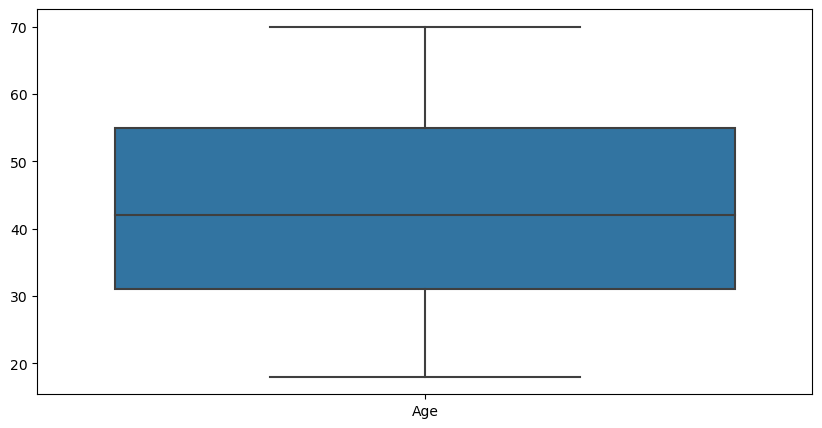

In [27]:
# Genera un gráfico de caja (boxplot) para cada columna en el data frame df_copy
# Si encuentras outliers, elimínalos solo si representan un porcentaje menor o igual al 4%
plt.figure(figsize=(10, 5))
sb.boxplot(data=df_replace_copy[['Age']])
plt.show()

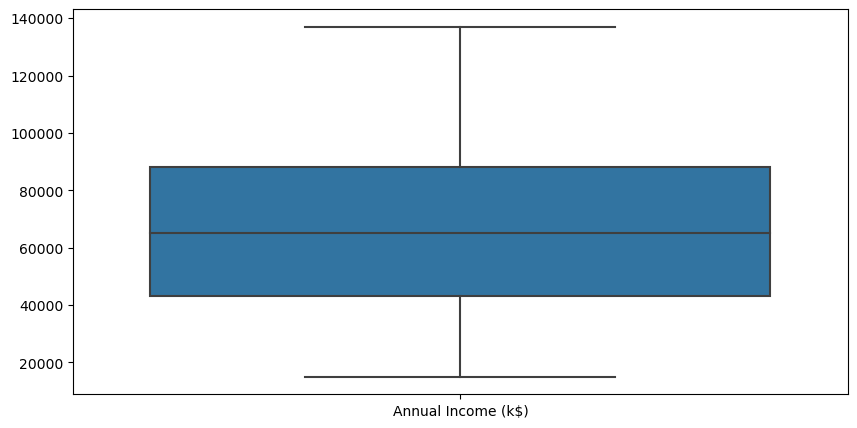

In [28]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=df_replace_copy[['Annual Income (k$)']])
plt.show()

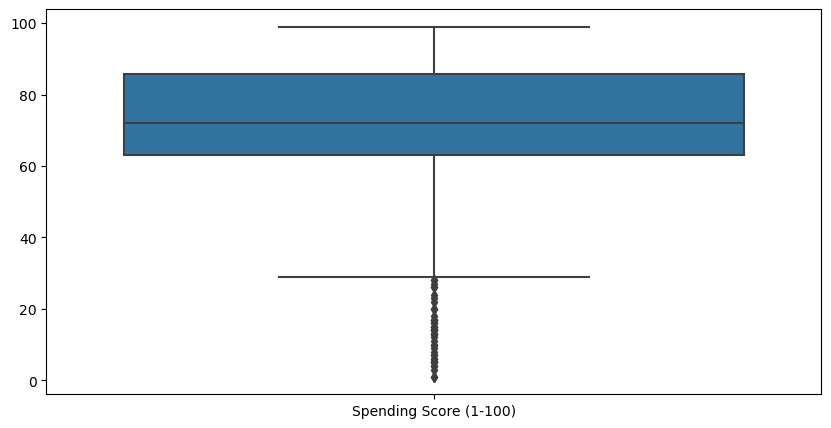

In [29]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=df_replace_copy[['Spending Score (1-100)']])
plt.show()

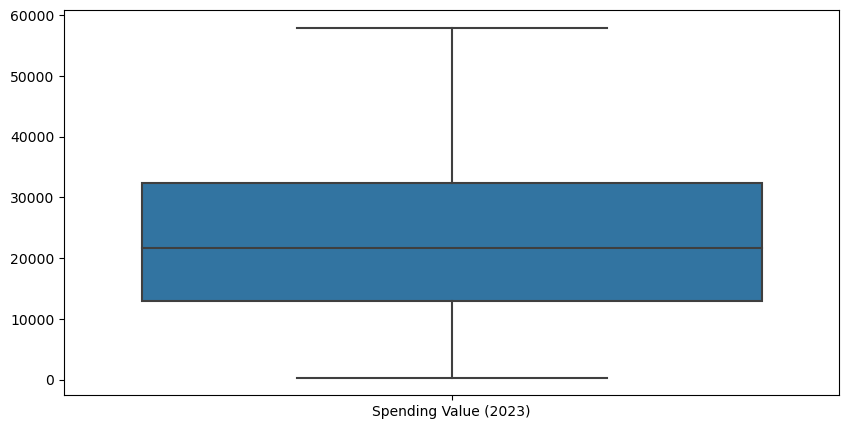

In [30]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=df_replace_copy[['Spending Value (2023)']])
plt.show()

In [31]:

Q1 = df_replace_copy['Spending Score (1-100)'].quantile(0.25)
Q3 = df_replace_copy['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar los valores atípicos
outliers_count = ((df_replace_copy['Spending Score (1-100)'] < lower_bound) | (df_replace_copy['Spending Score (1-100)'] > upper_bound)).sum()

# Calcular el porcentaje de valores atípicos
outliers_percentage = (outliers_count / len(df_replace_copy)) * 100

print("Porcentaje de valores atípicos en la columna 'Spending Score (1-100)':", outliers_percentage)

Porcentaje de valores atípicos en la columna 'Spending Score (1-100)': 5.610972568578553


##**Análisis de correlación de las variables**

<Axes: >

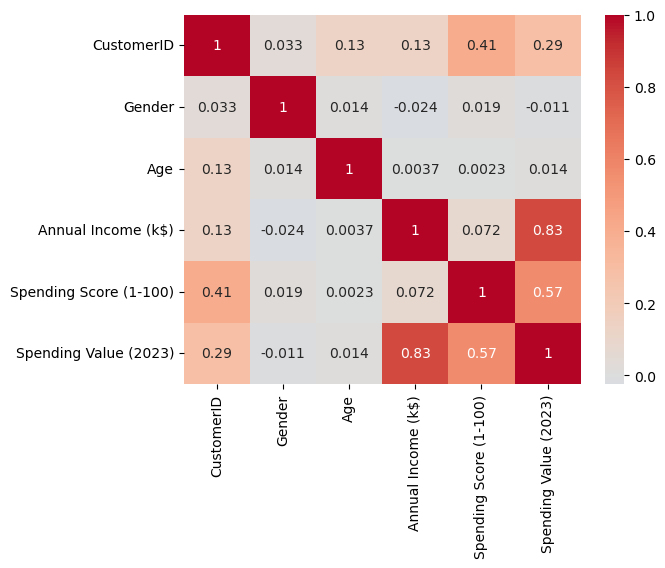

In [32]:
# Utiliza la biblioteca Seaborn para crear un mapa de calor (heatmap) o matriz de correlación de las variables del dataset.
sb.heatmap(df_replace_copy.corr(), annot=True, cmap='coolwarm', center=0)

In [33]:
#Ahora grafica la correlación que tiene cada una de ellas contra la variable Spending Score(1-100) y organízalas de mayor a menor.

correlation = df_replace_copy.corr()['Spending Score (1-100)'].sort_values(ascending=False)
print(correlation)

Spending Score (1-100)    1.000000
Spending Value (2023)     0.567973
CustomerID                0.406424
Annual Income (k$)        0.071967
Gender                    0.018836
Age                       0.002287
Name: Spending Score (1-100), dtype: float64


## **Agrupación por intervalos de la variable target**
Cuando los valores de una variable son muchos, conviene agrupar los datos en intervalos o clases para así realizar un mejor análisis e interpretación de ellos.

In [34]:
#Genera 5 intervalos para agrupar la variable Spending Score (1-100)
#Guárdalos en una nueva columna que se llame Spending Score_encoded
#Verifica que la nueva columna sea de tipo int

#0-> 0-20
#1-> 20-40
#2-> 40-60
#3-> 60-80
#4-> 80-100

df_replace_copy['Spending Score_encoded'] = pd.cut(df_replace_copy['Spending Score (1-100)'], bins=[0, 20, 40, 60, 80, 100], labels=[0, 1, 2, 3, 4]).astype(int)
print(df_replace_copy.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0  1099188127       1   19               15000                      39   
1  1100189128       1   21               15000                      81   
2  1101190129       0   20               16000                       6   
3  1102191130       0   23               16000                      77   
4  1103192131       0   31               17000                      40   

   Spending Value (2023)  Spending Score_encoded  
0                 2925.0                       1  
1                 6075.0                       4  
2                  480.0                       0  
3                 6160.0                       3  
4                 3400.0                       1  


In [35]:
df_replace_copy['Age'].isna().sum()

0

In [36]:
#Genera 5 intervalos para agrupar la variable Age
#Guárdalos en una nueva columna que se llame Age_encoded
#Verifica que la nueva columna sea de tipo int

#0-> 18-28
#1-> 28-38
#2-> 38-48
#3-> 48-58
#4-> 58-70

df_replace_copy['Age_encoded'] = pd.cut(df_replace_copy['Age'].astype(int), bins=[17, 28, 38, 48, 58, 71], labels=[0, 1, 2, 3, 4])

## **Análisis Univariado**
Incluye:
+ Medidas de tendencia central: media, mediana, moda.
+ Medidas de dispersión: rango, variance, valor máximo y mínimo, cuartiles (incluyendo rango intercuartil) y desviación estándar.

También se pueden se pueden usar gráficos como:
+ Histogramas.
+ Gráficos de barras.
+ Gráficos circulares.

In [37]:
# Obtén algunas estadísticas básicas de tendencia central para cada una de las variables del dataset

print(df_replace_copy.describe())

         CustomerID      Gender         Age  Annual Income (k$)  \
count  8.020000e+02  802.000000  802.000000          802.000000   
mean   1.501212e+09    0.521197   42.741895        65834.164589   
std    2.336370e+08    0.499862   14.744667        28319.404902   
min    1.099188e+09    0.000000   18.000000        15000.000000   
25%    1.299639e+09    0.000000   31.000000        43000.000000   
50%    1.500089e+09    1.000000   42.000000        65000.000000   
75%    1.700539e+09    1.000000   55.000000        88000.000000   
max    1.911000e+09    1.000000   70.000000       137000.000000   

       Spending Score (1-100)  Spending Value (2023)  Spending Score_encoded  
count              802.000000             802.000000              802.000000  
mean                70.810474           23515.517456                3.014963  
std                 20.316632           12904.526234                1.000512  
min                  1.000000             285.000000                0.000000  
2

<Axes: ylabel='count'>

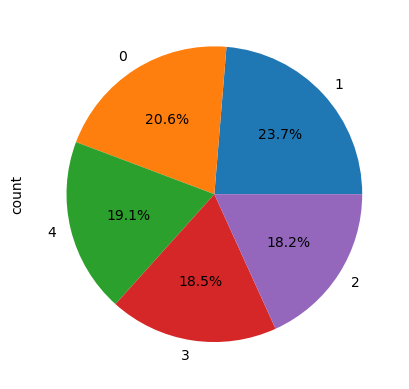

In [38]:
#Realiza un gráfico tipo pastel con pandas para ver como esta la distribución de la variable Age_encoded

df_replace_copy['Age_encoded'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

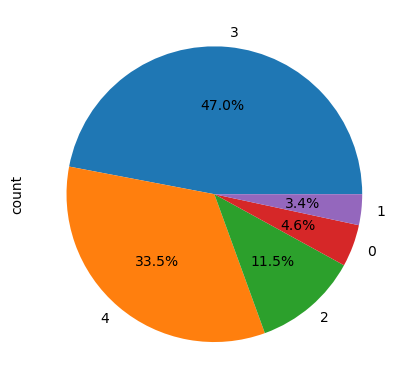

In [39]:
#Realiza un gráfico tipo pastel con pandas para ver como esta la distribución de la variable target
#Usa la variable Spending Score_encoded para ello.

df_replace_copy['Spending Score_encoded'].value_counts().plot.pie(autopct='%1.1f%%')

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Spending Value (2023)'}>],
       [<Axes: title={'center': 'Spending Score_encoded'}>, <Axes: >,
        <Axes: >]], dtype=object)

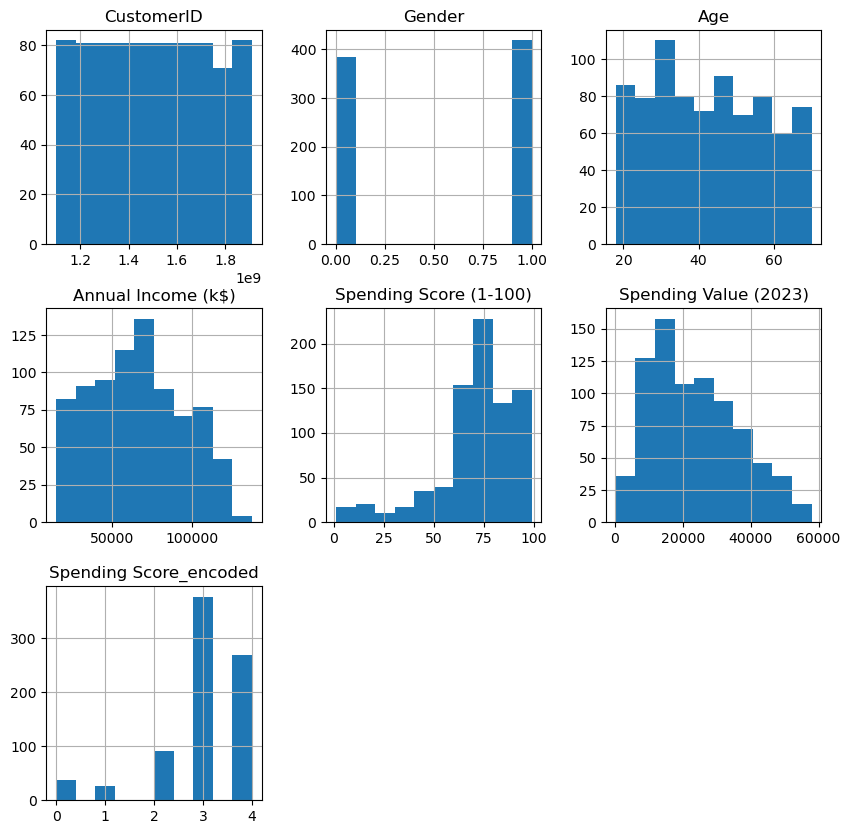

In [40]:
#Genera un histograma para cada una de las variables numéricas, esto con el fin de ver la dispersión de los datos

df_replace_copy.hist(figsize=(10, 10))


##**Ahora si, ¡ya puedes modelar!**

**Contexto general**

Aunque tu supermercado ha estado operando en un área establecida durante un tiempo, recientemente ha habido un cambio significativo en tu entorno comercial: se ha construido una nueva urbanización cerca de tu ubicación.

Este desarrollo urbano ha traído consigo una afluencia de nuevos residentes, lo que significa que tu supermercado está experimentando un aumento en el tráfico de clientes.

Para esta fase deberás **elegir cuál de los siguientes algoritmos aplicar dependiendo de cada caso**:
* **Regresión lineal -->** cuando la apliques debes probar la **simple** y la **multiple**, escalando siempre los datos. Además, realiza el proceso de validación normal y compáralo con K-fold cross validation.
* **KNN -->** antes de aplicarlo calcula el baseline y escala los datos después de realizar su respectiva partición.
* **SVM -->** antes de aplicarlo calcula el baseline, escala los datos después de realizar su respectiva partición, y usa GridSearchCV para encontrar la mejor combinación de hiperparámetros.
* **Decision Tree -->** antes de aplicarlo calcula el baseline, escala los datos después de realizar su respectiva partición, y usa GridSearchCV para encontrar la mejor combinación de hiperparámetros.

👉 Además, deberás realizar un **informe de laboratorio (con extensión máx de 4 pág.)** que condense lo siguiente:

* Interpretación de cada una de las gráficas generadas hasta el momento (fase de análisis).
* Justificación de la elección de los algoritmos implementados en cada caso, para ello, ten en cuenta la teoría y características principales de los mismos.
* Explicación de las métricas de evaluación arrojadas para cada algoritmo y qué combinación de parámetros o pasos hiciste para obtener el mejor modelo posible.
* ¿Mejoraron el/los modelos del caso #1 con la aplicación del k-fold cross validation o no hubo una diferencia significativa?
* Investiga para qué calcular el valor de baseline y que significa, ¿cómo fue la precisión de los modelos KNN, SVM y decision tree con respecto a dicho valor?
* ¿Cuál fue el impacto del GridSearchCV en los algoritmos KNN, SVM y decision tree?, ¿Si impacto el uso de esta herramienta en sus desempeños?

👀 NOTA: por favor sé concreto y no incluyas screenshot de bloques de código en tu informe, lo importante son las imágenes de las gráficas obtenidas. Coloca tu nombre y código en el encabezado, no hay necesidad de portada 😀.


###**Caso #1**:
Supongamos que estamos a mitad del año 2023, y como propietario de tu negocio estas entusiasmado por conocer cuál será el valor aproximado de gasto que tus nuevos clientes alcanzarán al final del mismo, esto basándote en los datos de tus clientes actuales. Esta predicción será fundamental para ayudarte a tomar decisiones de negocio relacionadas con inventario, colaboradores y proveedores.

Para ello, deberás eligir el mejor algoritmo que se adapte a esta situación. Es importante que compares e interpretes las métricas arrojadas tanto para el dataset de entrenamiento, como el de test (usa la partición 80-20). Adicionalmente, especifica si este es un problema de clasificación o regresión, y por qué.

####**Probando X modelo**

#####**Creación del modelo**

In [41]:
df_replace_copy.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Value (2023),Spending Score_encoded,Age_encoded
807,1906995934,0,62,57000,70,19950.0,3,4
808,1907996935,0,44,79000,70,27650.0,3,2
809,1908997936,0,23,94000,70,32900.0,3,0
810,1909998937,0,55,78000,70,27300.0,3,3
811,1910999938,1,29,118000,70,41300.0,3,1


In [64]:

features = ['Gender', 'Age', 'Annual Income (k$)']
target = 'Spending Value (2023)'

# Divide el conjunto de datos en características (X) y la variable objetivo (y)
X = df_replace_copy[features]
y = df_replace_copy[target]

# Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide los datos escalados en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Inicializa y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### **Evaluación del modelo: training dataset**

In [65]:
y_pred = model.predict(X_train)

from sklearn.metrics import mean_squared_error

r_sq = model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

mse = metrics.mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)


coefficient R^2 for training data: 0.6856
MSE= 51397376.1595
RMSE: 7169.1963


##### **Evaluación del modelo: test dataset**

In [69]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn import metrics

r_sq = model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)



coefficient R^2 for test data: 0.6900
MSE= 54932558.9221
RMSE: 7411.6502


##### **Usando K-fold cross validation**

In [45]:
#Usando K-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print('MSE scores:', (-scores))
print('RMSE: %.4f' % np.sqrt(-scores).mean())

MSE scores: [9.35687131e+07 1.22548905e+08 3.19540828e+07 2.55728522e+07
 2.04962222e+07]
RMSE: 7196.0607


###**Caso #2**:
Supongamos que por el momento tienes acceso a datos como la edad, ingreso anual y género de los nuevos clientes, pero aún no dispones de su puntaje de gasto, ya que este se define a medida que pasa el tiempo. Sin embargo, se te ocurre que puedes abordar esta situación usando los datos de aquellos clientes antiguos (porque ya tienen un puntaje de gasto asignado). La idea entonces es que eligas un algoritmo que te permita hacer predicciones basadas en características similares de clientes existentes.

Es importante que compares e interpretes las métricas arrojadas tanto para el dataset de entrenamiento, como el de test (usa la partición 80-20). Usa la variable de puntaje de gasto codificada. Adicionalmente, especifica si este es un problema de clasificación o regresión, y por qué.

####**Probando X modelo**

#####**Calculando el baseline**

In [71]:
X = df_replace_copy[['Gender', 'Age', 'Annual Income (k$)']].values
y = df_replace_copy['Spending Score_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.2)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#####**Creando el modelo**

In [72]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)


KNeighborsClassifier()

#####**Evaluación del modelo: training dataset**

In [73]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of K-NN classifier on training set: 0.59


#####**Evaluación del modelo: test dataset**

In [74]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 0.40


###**Caso #3:**
Tu supermercado está considerando realizar un gran pedido de productos para el cuidado personal, pero no estás seguro si deberías enfocarte en productos diseñados para un género específico o si deberías ofrecer una variedad equilibrada para ambos géneros. Para tomar esta decisión de manera más informada, deseas predecir el género de tus nuevos clientes. Esta información te ayudará a determinar qué tipo de productos de cuidado personal podrían ser más populares entre tus clientes potenciales. Lo ideal sería usar un algoritmo que te permita encontrar un hiperplano que pueda separar efectivamente los datos de clientes en diferentes grupos basados en sus características, lo que te permitirá identificar patrones en el comportamiento de compra y tomar decisiones estratégicas sobre qué tipo de productos ofrecer.

Es importante que compares e interpretes las métricas arrojadas tanto para el dataset de entrenamiento, como el de test (usa la partición 80-20). Adicionalmente, especifica si este es un problema de clasificación o regresión, y por qué.

####**Probando X modelo**

#####**Calculando el baseline**

In [77]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 2, max_x + 2)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

features=["Spending Score (1-100)","Annual Income (k$)"]

X=df_replace_copy[features]
Y=df_replace_copy["Gender"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

#####**Creando el modelo**

In [78]:
from sklearn import svm
C    = 100
gamma= 10
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
clf_rbf.fit(X_train, y_train)

SVC(C=100, gamma=10)

#####**Evaluando el modelo: training dataset**

Accuracy of SVM classifier on training set: 0.99


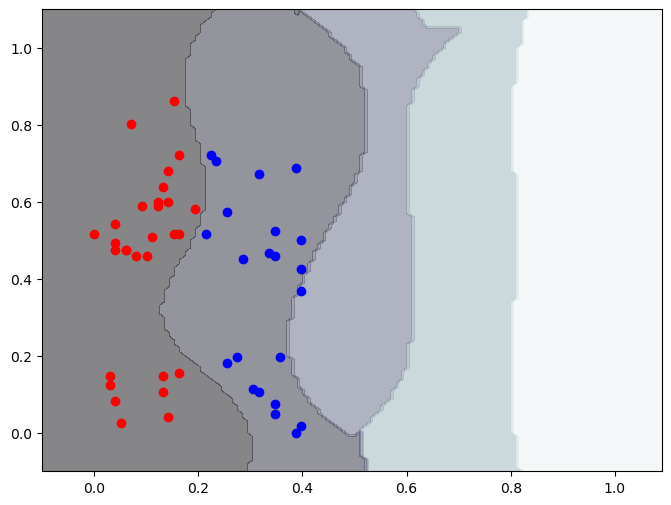

In [79]:
def plot_hyperplane(clf, X):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.5)


plt.figure(figsize=(8, 6))

plt.plot(X_train[y_train==0,0],X_train[y_train==0,1],'or')
plt.plot(X_train[y_train==1,0],X_train[y_train==1,1],'ob')

plot_hyperplane(clf_rbf, X_train)

print('Accuracy of SVM classifier on training set: {:.2f}' .format(clf_rbf.score(X_train, y_train)))

#####**Evaluando el modelo: test dataset**

Accuracy of SVM classifier on training set: 0.99


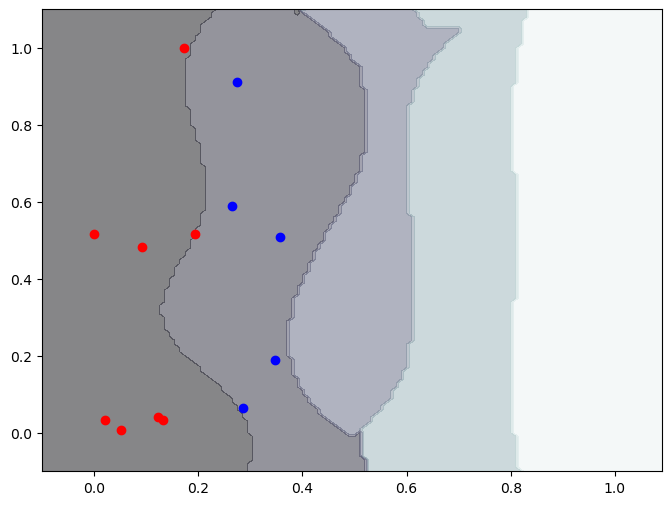

In [81]:
def plot_hyperplane(clf, X):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.5)

plt.figure(figsize=(8, 6))

plt.plot(X_test[y_test==0,0],X_test[y_test==0,1],'or')
plt.plot(X_test[y_test==1,0],X_test[y_test==1,1],'ob')

plot_hyperplane(clf_rbf, X_test)


print('Accuracy of SVM classifier on training set: {:.2f}' .format(clf_rbf.score(X_train, y_train)))

##### **Usando GridSearchCV para encontrar los mejores hiperparámetros**

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir los hiperparámetros a probar
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [0.1, 1, 10,100]}


# Crear el objeto GridSearchCV
grid_search = GridSearchCV(clf_rbf, param_grid, cv=5)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
accuracy = best_model.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("Precisión del modelo:", accuracy)


Mejores hiperparámetros: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Precisión del modelo: 1.0


### **Caso #4**
Tu supermercado está buscando formas de mejorar su estrategia de marketing y la experiencia del cliente, por lo que deseas explorar la relación entre la edad de tus clientes y su comportamiento de compra. Para abordar esta pregunta, puedes optar por una técnica que permita clasificar a tus clientes en grupos basados en su edad y analizar cómo estas segmentaciones se correlacionan con diferentes patrones de compra. La idea es que apliques un algoritmo que tenga la capacidad para estructurar los datos de manera jerárquica y facilite la comprensión de las relaciones entre las diferentes variables.

Es importante que compares e interpretes las métricas arrojadas tanto para el dataset de entrenamiento, como el de test (usa la partición 80-20). Usa la variable edad codificada. Adicionalmente, especifica si este es un problema de clasificación o regresión, y por qué.

####**Probando X modelo**

##### **Calculando el baseline**

In [56]:
X = df_replace_copy[['Gender', 'Age', 'Annual Income (k$)']]
y = df_replace_copy['Spending Score_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.2)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### **Creando el modelo**

In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_leaf=2, min_samples_split=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

##### **Evaluando el modelo: training dataset**

In [58]:
#Predict the response for test dataset
y_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.5553822152886115


##### **Evaluando el modelo: test dataset**

In [59]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.453416149068323


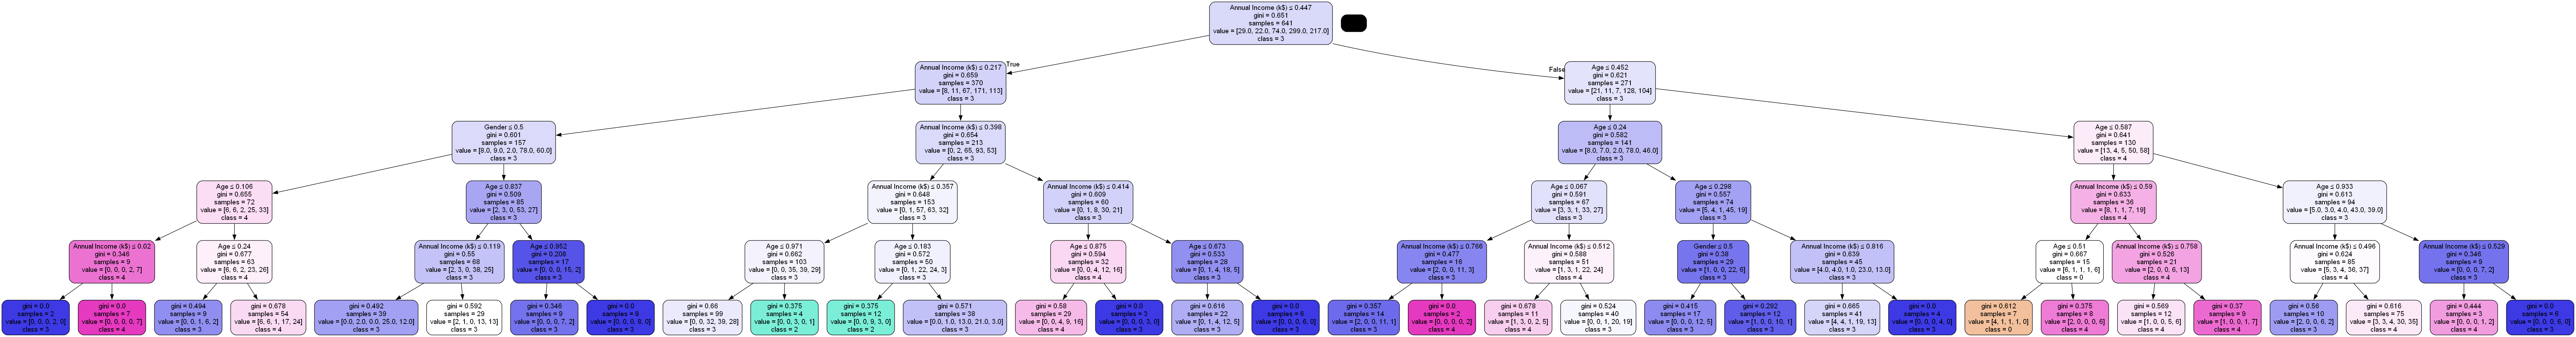

In [60]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Gender', 'Age', 'Annual Income (k$)'],class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mall.png')
Image(graph.create_png())


##### **Usando GridSearchCV para encontrar los mejores hiperparámetros**

In [83]:
# Definir los hiperparámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo
model = DecisionTreeClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

print("Mejores hiperparámetros:", best_params)
print("Precisión del modelo:", best_model.score(X_test, y_test))



Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión del modelo: 1.0
